In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1653251633.


In [4]:
# create random coordinate function (-100 < X < 100)
rcoord = lambda: r.random() * 100 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of customers
i_data = pd.DataFrame()
len_ = 100

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Demand'] = [r.random() + r.randrange(50, 100) for _ in range(len_)]

i_data.head(10)

,X,Y,Demand
0,-35.043485,-1.383783,87.457168
1,59.487516,-58.104575,81.340354
2,43.188205,-61.123582,76.682172
3,-31.661355,-22.495072,78.656924
4,-40.633078,-29.893629,58.177982
5,9.530255,-15.617275,99.809616
6,91.986361,-93.393798,54.826897
7,-43.226096,78.819129,50.104467
8,-20.872101,-11.134395,71.259521
9,-59.863065,-62.839933,98.776432


In [6]:
# create set of candidate locations
j_data = pd.DataFrame()
len_ = 20

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]
j_data['Fixed Charge'] = [r.random() + r.randrange(5000, 10000) for _ in range(len_)]

j_data.head(10)

,X,Y,Fixed Charge
0,-35.870143,52.768526,6708.410887
1,-95.611345,9.745609,7447.590386
2,-68.789997,-6.574332,6167.174661
3,48.826864,-80.724671,5471.210320
4,93.126702,79.768578,9869.180250
5,-11.440377,31.048542,7797.392309
6,53.236537,-60.075277,8457.914199
7,-8.719744,-83.696784,8846.566447
8,-29.375419,90.884559,7738.391207
9,4.887305,81.997967,9327.461023


Text(0.5, 1.0, 'Customer and Facility Locations')

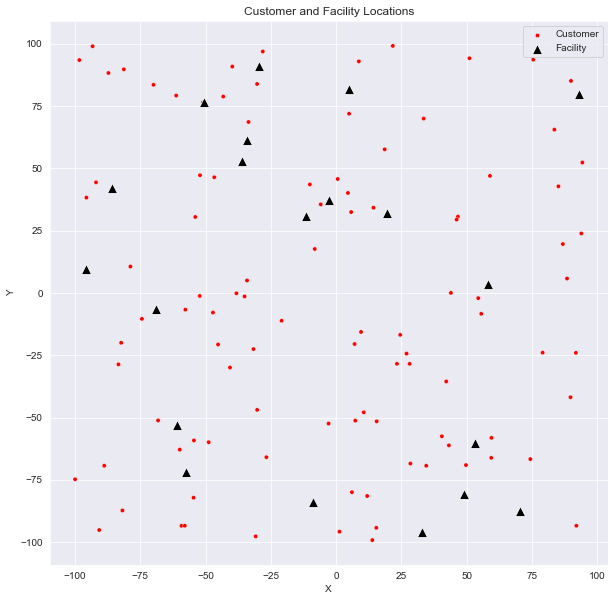

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=i_data, size=1, color='red', legend=False, label="Customer")
sns.scatterplot(x='X', y='Y', data=j_data, s=100, color='black', marker='^', label="Facility")
plt.legend()
plt.title('Customer and Facility Locations')

In [8]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[ 54.15861825,  61.58188912,  34.1433578 , ...,  64.13757847,  50.54685659,  73.80724815],
       [146.23928228, 169.29059101, 138.24068252, ...,  98.76151394, 113.92531708, 117.62242115],
       [138.64211002, 155.84529957, 124.55817296, ...,  96.29683269, 108.65356353, 101.08908307],
       ...,
       [157.23276516, 192.38442192, 162.39508352, ..., 102.0038238 , 121.67528878, 150.09274086],
       [113.44792708,  80.25720359,  54.49666239, ..., 117.60069566, 109.57405007,  12.92265495],
       [103.37496758, 129.48667177,  99.34485552, ...,  61.25051207,  72.64519574,  95.81944715]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
